# Report: Weekly patterns in Electricity and Gas Usage
Responsible for this report: Myrto Pieridou (s3841898), Maria Anthoulaki

## Research Question:
This report is about finding any possible weekly patterns regarding electricity and Gas usage.\
So the general question is: 'Are there weekly patterns in the electricity and gas usage in 2023?' 

In [70]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from home_messages_db import HomeMessagesDB
import warnings
import numpy as np

db = HomeMessagesDB('sqlite:///myhome.db')
df = db.get_p1e()
df.head(5)

,id,time,electricity_imported_t1,electricity_imported_t2,electricity_exported_t1,electricity_exported_t2
0,1,2022-01-01 01:00:00,NaN,NaN,NaN,NaN
1,2,2022-01-01 01:15:00,NaN,NaN,NaN,NaN
2,3,2022-01-01 01:30:00,NaN,NaN,NaN,NaN
3,4,2022-01-01 01:45:00,NaN,NaN,NaN,NaN
4,5,2022-01-01 02:00:00,NaN,NaN,NaN,NaN


## P1e: Electricity Usage

Firstly, as we mentioned in the research question, we decided to check if there are any flactuation of the electricity usage in 2023.
To enable the required visualization,we performed data manipulation and added extra columns in the dataframe which contains out p1e data.
In order to improve our ability to derive meaningful conclusions about the patterns, we also included the matching month information in the plots.
Since we have columns regarding electricity usage in low-cost and high-cost hours we added a column for the sum of those two and make our conclusions about that total.
We also added a column with Year:Week, where Year is the year and Week is the number of the week of that Year.
Finally, we added a column named 'Month' with numbers referring to months and a column named 'Month_Name' with the names of the months.
Then we computed the mean usage of total electricity for every week according to measurements we have(usually every 15 minutes) and visualize it with colors that represent the months.
It is important to mention that since the total electricity column just keeps adding the electricity, we calculated and plot the differences.

In [113]:
warnings.filterwarnings('ignore')
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])
df['Totalelectricity'] = df['electricity_imported_t1'] + df['electricity_imported_t2']+df['electricity_exported_t1'] + df['electricity_exported_t2']
df['Year:Week'] = df['time'].dt.strftime('%G:%V')
df['Month'] = df['time'].dt.month
# Calculate the mean usage for every week's entry
mean_usage_per_week = df.groupby('Year:Week')['Totalelectricity'].mean()
df['Month_Name'] = df['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
11: 'November', 12: 'December'})
# Check how many entries for each week
week_counts = df['Year:Week'].value_counts()
# Aggregate the data
p1e_plot = df.groupby('Year:Week').agg({'Totalelectricity': 'sum','Month_Name': 'first' }).reset_index()
# Merge the mean_usage_per_week with p1e_plot on 'Year:Week' column
p1e_plot = p1e_plot.merge(mean_usage_per_week, on='Year:Week', how='left')
p1e_plot.rename(columns={'Totalelectricity': 'Mean_Usage_Per_Week'}, inplace=True)
df.head()


,id,time,electricity_imported_t1,electricity_imported_t2,electricity_exported_t1,electricity_exported_t2,day,Totalelectricity,Year:Week,Month,Month_Name,Electricity_Difference,Day
15052,15053,2022-06-06 22:00:00,7018.281,5660.101,0.0,0.0,Monday,12678.382,2022:23,6,June,-4312.331,Monday
15053,15054,2022-06-06 22:15:00,7018.321,5660.101,0.0,0.0,Monday,12678.422,2022:23,6,June,0.040,Monday
15054,15055,2022-06-06 22:30:00,7018.640,5660.101,0.0,0.0,Monday,12678.741,2022:23,6,June,0.319,Monday
15055,15056,2022-06-06 22:45:00,7019.304,5660.101,0.0,0.0,Monday,12679.405,2022:23,6,June,0.664,Monday
15056,15057,2022-06-06 23:00:00,7019.431,5660.101,0.0,0.0,Monday,12679.532,2022:23,6,June,0.127,Monday


In [173]:
#calculate the differences
p1e_plot2=p1e_plot.set_index(['Year:Week', 'Month_Name']).diff().reset_index()
# Ensure the columns Year_Week and MonthName are properly aligned
p1e_plot2['Year_Week'] = p1e_plot2['Year:Week']
p1e_plot2['MonthName'] = p1e_plot2['Month_Name']
p1e_plot2.head()

,Year:Week,Month_Name,Totalelectricity_x,Totalelectricity_y,Year_Week,MonthName
0,2022:11,March,NaN,NaN,2022:11,March
1,2022:12,March,5215739.738,47.721299,2022:12,March
2,2022:13,March,157429.167,75.335971,2022:13,March
3,2022:14,April,66890.930,81.865587,2022:14,April
4,2022:15,April,-7800.770,78.684930,2022:15,April


# P1e visualization 1
The first visualization regarding the P1e is about to check if there are any specific patterns in the mean electricity usage for every week of 2023.


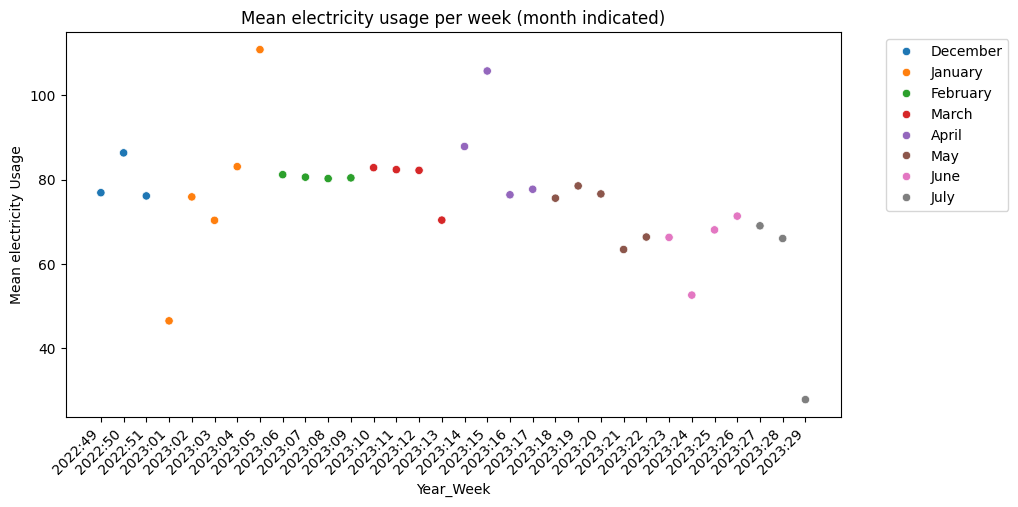

In [172]:
# Define the specific weeks you want to include
selected_weeks = [f'2022:{i:02d}' for i in range(49, 52)] + [f'2023:{i:02d}' for i in range(1, 30)]
# Filter the DataFrame to include only the selected weeks
p1e_plot_selected = p1e_plot2[p1e_plot2['Year_Week'].isin(selected_weeks)]
# Plot the mean electricity usage per week
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Mean electricity usage per week (month indicated)")
sb.scatterplot(p1e_plot_selected, x='Year_Week', y='Totalelectricity_y', hue='MonthName', ax=ax, palette='tab10')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Mean electricity Usage')
# Get handles and labels for legend
handles, labels = plt.gca().get_legend_handles_labels()
# Add legend to plot
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Comments on P1e Visualization 1

The graphic above shows that there are fluctuations a in the mean electricity usage between week 51 in 2022 and week 27 in 2023. This visualization allowa us to observethat January has both the highest and lowest electricity usage which is 48kwh and 118kwh respectively. However this  does not provide us with a complete picture of the fluctuations. The average amount of electricity used appears to range from 78 to 98 starting in December, with a significant decline observed in the first week of January. The next week of January saw yet another significant rise. Between that week and the final week of March, the average amount of electricity used stabilized.Furthermore, the average electricity demand increases during the first two weeks of April once more, but then decreases until the first week of July. These findings make sense because wintertime often sees higher electricity usage due to colder temperatures than summertime ones.

# P1e visualization 2
We then decided to check also if  there are fluctuations of the mean electricity usage across the different days of the week for every month.

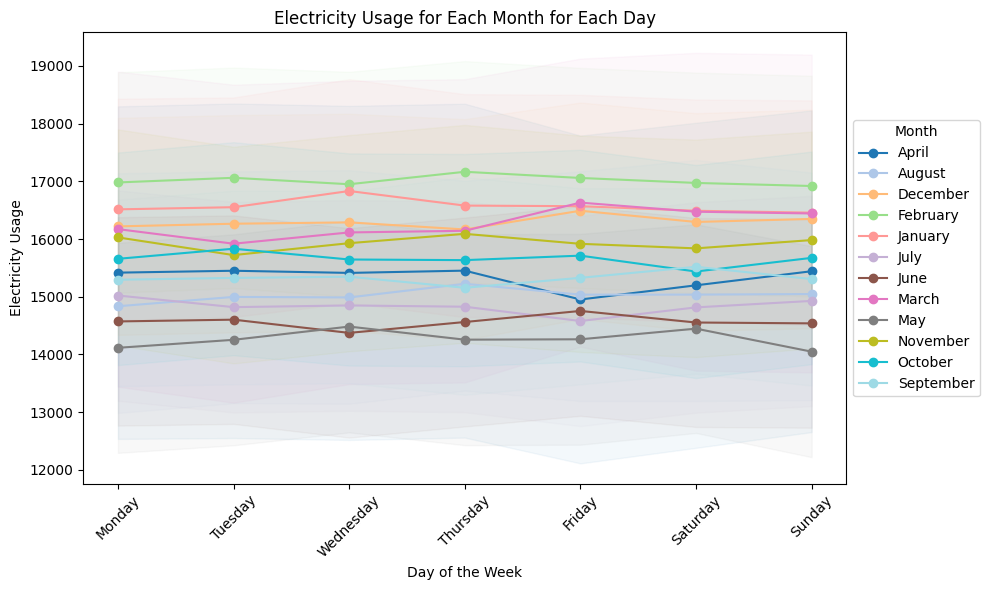

In [160]:
# Group by 'Month_Name' and 'day', and calculate the mean and standard deviation of 'Totalelectricity' for each group
grouped = df.groupby(['Month_Name', 'day'])['Totalelectricity'].agg(['mean', 'std']).reset_index()
months = grouped['Month_Name'].unique()

colors = plt.cm.tab20(np.linspace(0, 1, len(months)))
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over unique months, assign color, and plot each month separately
for month, color in zip(months, colors):
    month_data = grouped[grouped['Month_Name'] == month]
    ax.plot(month_data['day'], month_data['mean'], marker='o', label=month, color=color)
    ax.fill_between(month_data['day'], month_data['mean'] - month_data['std'], month_data['mean'] + month_data['std'], color=color, alpha=0.05)  

# Add legend on the left side and titles
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Electricity Usage')
ax.set_title('Electricity Usage for Each Month for Each Day')
ax.legend(title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comments on P1e Visualization 2


The plot above shows that, even within the same months, there are variations in the average amount of power used on different days of the week. That graphic makes it clear that, compared to the other months, practically all daily electricity usage is lower in May. On the other hand, the highest daily mean electricity use occurs in December, January, and February, with February topping the list. All things considered, we can state that certain months, like October, July, and March, exhibit fluctuations in daily consumption and do not conform to any particular pattern.
We can also use these graphs to make additional observations about the patterns that exist between the days of the week. For instance, we can observe that, depending on the month, different days have higher electricity usage. It's Thursday for February and November and Wednesday for May and January.
Furthermore, it is noticeable that certain months, including December, April, and September, appear stable during the first three days of the week.
Thus, a general conclusion would be that electricity usage is lower in the late spring and early summer months of May and June, and greater in the winter months of December, January, and February. Given that demand is higher in the winter than it is in the spring, this makes sense. Furthermore, as there are several fluctuations for eacseveral months and there is no pattern in the consumption of energy, we are unable to draw any conclusions about the consumption on a daily basis.